# Roughness parameters (SuPy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import supy as sp
import warnings
warnings.filterwarnings('ignore')

## Loading data, cleaning and getting ready for optimization

In [2]:
name_of_site='US-MMS'
years=[2010,2012,2016]


df_attr=pd.read_csv('all_attrs.csv')
z_meas=df_attr[df_attr.site==name_of_site].meas.values[0]
h_sfc=df_zmeas=df_attr[df_attr.site==name_of_site].height.values[0]
folder='data/data_csv_zip_clean_roughness/'
site_file = folder+'/'+name_of_site + '_clean.csv.gz'
df_data = pd.read_csv(site_file, index_col='time', parse_dates=['time'])
# Rain
bb=pd.DataFrame(~np.isin(df_data.index.date,df_data[df_data.P!=0].index.date))
bb.index=df_data.index
df_data=df_data[bb.values]


df_data=df_data[(df_data['WS']!=0)]

df_years=df_data.loc[f'{years[0]}']
for i in years[1:]:
    df_years=df_years.append(df_data.loc[f'{i}'])

df_val = df_years.loc[:, ['H', 'USTAR', 'TA', 'RH', 'PA', 'WS']].dropna()
df_val.head()

,H,USTAR,TA,RH,PA,WS
time,,,,,,
2010-01-01 00:00:00,21.873,0.739,-8.08,70.503,98.836,3.695
2010-01-01 01:00:00,41.819,0.855,-9.17,72.757,98.880,3.928
2010-01-01 02:00:00,-6.078,0.699,-9.63,72.611,98.910,3.088
2010-01-01 03:00:00,-16.788,0.581,-10.03,73.868,98.970,3.623
2010-01-01 04:00:00,5.006,0.562,-10.36,74.242,99.030,3.474


## Running supy to calculate z0 and d

In [3]:
z0,d,ser_ws,ser_ustar=sp.util.optimize_MO(df_val,z_meas,h_sfc)

## Calculating model wind speed using logarithmic law

In [4]:
def uz(z0,d,ser_ustar,z_meas):
    z = z_meas
    k = 0.4
    uz = (ser_ustar / k) * np.log((z - d) / z0)
    return uz

ws_model=uz(z0,d,ser_ustar,z_meas)

(0.0, 10.0)

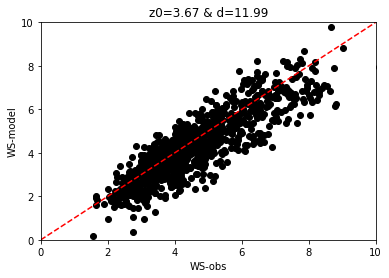

In [5]:
plt.scatter(ser_ws,ws_model,color='k')
plt.xlabel('WS-obs')
plt.ylabel('WS-model')
plt.title(f'z0={np.round(z0,2)} & d={np.round(d,2)}')
plt.plot([0,10],[0,10],color='r',linestyle='--')
plt.ylim([0,10])
plt.xlim([0,10])